# Homework 4: Functions, Histograms, and Groups

**Reading**: 

* [Visualizing Numerical Distributions](https://www.inferentialthinking.com/chapters/07/2/visualizing-numerical-distributions.html) 
* [Functions and Tables](https://www.inferentialthinking.com/chapters/08/functions-and-tables.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 4 is due Thursday, 2/21 at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule.
You will receive an early submission bonus point if you turn in your final submission by Wednesday, 2/20 at 11:59pm. Late work will not be accepted as per the [policies](http://data8.org/sp19/policies.html) of this course. 

Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw04.ok')

Assignment: Homework 4: Functions, Histograms, and Groups
OK, version v1.12.5



Before continuing the assignment, select "Save and Checkpoint" in the File menu and then execute the submit cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to okpy.org and flag the correct version. There will be another submit cell at the end of the assignment when you finish!

In [2]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw04.ipynb'.
Submit... 100% complete
Submission successful for user: haoyunhong@berkeley.edu
URL: https://okpy.org/cal/data8/sp19/hw04/submissions/zvKpjq



## 1. Causes of Death by Year


This exercise is designed to give you practice using the Table method `pivot`. [Here](http://data8.org/sp19/python-reference.html) is a link to the Python reference page in case you need a quick refresher.

We'll be looking at a [dataset](http://www.healthdata.gov/dataset/leading-causes-death-zip-code-1999-2013) from the California Department of Public Health that records the cause of death, as recorded on a death certificate, for everyone who died in California from 1999 to 2013.  The data is in the file `causes_of_death.csv.zip`. Each row records the number of deaths by a specific cause in one year in one ZIP code.

To make the file smaller, we've compressed it; run the next cell to unzip and load it.

In [3]:
!unzip -o causes_of_death.csv.zip
causes = Table.read_table('causes_of_death.csv')
causes

Archive:  causes_of_death.csv.zip
  inflating: causes_of_death.csv     


Year,ZIP Code,Cause of Death,Count,Location
1999,90002,SUI,1,"(33.94969, -118.246213)"
1999,90005,HOM,1,"(34.058508, -118.301197)"
1999,90006,ALZ,1,"(34.049323, -118.291687)"
1999,90007,ALZ,1,"(34.029442, -118.287095)"
1999,90009,DIA,1,"(33.9452, -118.3832)"
1999,90009,LIV,1,"(33.9452, -118.3832)"
1999,90009,OTH,1,"(33.9452, -118.3832)"
1999,90010,STK,1,"(34.060633, -118.302664)"
1999,90010,CLD,1,"(34.060633, -118.302664)"
1999,90010,DIA,1,"(34.060633, -118.302664)"


The causes of death in the data are abbreviated.  We've provided a table called `abbreviations.csv` to translate the abbreviations.

In [4]:
abbreviations = Table.read_table('abbreviations.csv')
abbreviations.show()

Cause of Death,Cause of Death (Full Description)
AID,Acquired Immune Deficiency Syndrome (AIDS)
ALZ,Alzheimer's Disease
CAN,Malignant Neoplasms (Cancers)
CLD,Chronic Lower Respiratory Disease (CLRD)
CPD,Chronic Obstructive Pulmonary Disease (COPD)
DIA,Diabetes Mellitus
HIV,Human Immunodeficiency Virus Disease (HIVD)
HOM,Homicide
HTD,Diseases of the Heart
HYP,Essential Hypertension and Hypertensive Renal Disease


The dataset is missing data on certain causes of death, such as homicide and hypertensive renal disease, for certain years.  It looks like those causes of death are relatively rare, so for some purposes it makes sense to drop them from consideration.  Of course, we'll have to keep in mind that we're no longer looking at a comprehensive report on all deaths in California.

**Question 1.** Let's clean up our data. First, filter out the HOM, HYP, and NEP rows from the table for the reasons described above. Next, join together the abbreviations table and our causes of death table so that we have a more detailed discription of each disease in each row. Lastly, drop the column which contains the acronym of the disease, and rename the column with the full description 'Cause of Death'. Assign the variable `cleaned_causes` to the resulting table. 

*Hint:* You should expect this to take more than one line. Use many lines and many intermediate tables to complete this question. 

In [24]:
cleaned_causes_1 = abbreviations.where("Cause of Death", are.not_equal_to("HOM") )
cleaned_causes_2 = cleaned_causes_1.where("Cause of Death", are.not_equal_to("HYP"))
cleaned_causes_3 = cleaned_causes_2.where("Cause of Death", are.not_equal_to("NEP"))
cleaned_causes = causes.join("Cause of Death", cleaned_causes_3).drop("Cause of Death").relabel("Cause of Death (Full Description)", "Cause of Death")
cleaned_causes

Year,ZIP Code,Count,Location,Cause of Death
1999,90006,1,"(34.049323, -118.291687)",Alzheimer's Disease
1999,90007,1,"(34.029442, -118.287095)",Alzheimer's Disease
1999,90012,1,"(34.061396, -118.238479)",Alzheimer's Disease
1999,90015,1,"(34.043439, -118.271613)",Alzheimer's Disease
1999,90017,1,"(34.055864, -118.266582)",Alzheimer's Disease
1999,90020,1,"(34.066535, -118.302211)",Alzheimer's Disease
1999,90031,1,"(34.078349, -118.211279)",Alzheimer's Disease
1999,90033,1,"(34.048676, -118.208442)",Alzheimer's Disease
1999,90042,1,"(34.114527, -118.192902)",Alzheimer's Disease
1999,90044,1,"(33.955089, -118.290119)",Alzheimer's Disease


In [25]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



We're going to examine the changes in causes of death over time.  To make a plot of those numbers, we need to have a table with one row per year, and the information about all the causes of death for each year.

**Question 2.** Create a table with one row for each year and a column for each kind of death, where each cell contains the number of deaths by that cause in that year. Call the table `cleaned_causes_by_year`.

In [32]:
cleaned_causes_by_year = cleaned_causes.pivot("Cause of Death", "Year",values="Count", collect=sum)
cleaned_causes_by_year.show(15)

Year,All Other Causes,Alzheimer's Disease,Cerebrovascular Disease (Stroke),Chronic Liver Disease and Cirrhosis,Chronic Lower Respiratory Disease (CLRD),Diabetes Mellitus,Diseases of the Heart,Intentional Self Harm (Suicide),Malignant Neoplasms (Cancers),Pneumonia and Influenza,Unintentional Injuries
1999,38392,3934,18079,3546,13187,6004,69900,3047,52880,8014,8940
2000,39259,4398,18090,3673,12754,6203,68533,3113,53005,8355,8814
2001,38383,4897,18078,3759,13056,6457,69004,3256,53810,8167,9274
2002,41177,5405,17551,3725,12643,6783,68387,3210,53926,8098,9882
2003,40325,6585,17686,3832,13380,7088,69013,3396,54307,8184,10470
2004,39926,6962,16884,3686,12519,7119,65002,3364,53708,7331,10614
2005,41791,7694,15550,3819,13166,7679,64684,3188,54606,7537,10924
2006,42965,8141,15011,3826,12807,7367,64648,3296,54043,7329,11236
2007,43130,8495,13724,4052,12497,7395,62220,3543,54918,6522,11426
2008,42800,10095,13792,4142,13346,7349,60739,3729,54579,6576,10667


In [33]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Make a plot of all the causes of death by year, using your cleaned-up version of the dataset.  There should be a single plot with one line per cause of death.

*Hint:* Use the Table method `plot`.  If you pass only a single argument, a line will be made for each of the other columns.

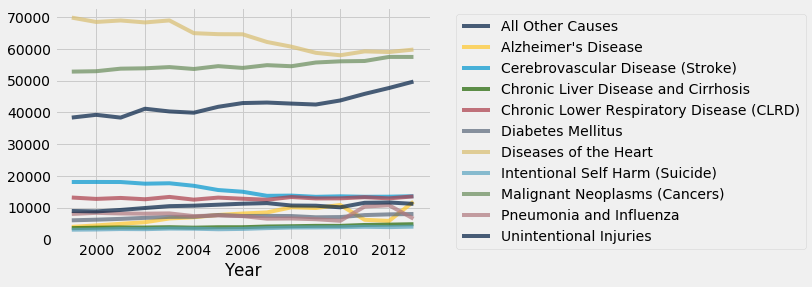

In [34]:
cleaned_causes_by_year.plot("Year")

After seeing the plot above, we would now like to examine the distributions of diseases over the years using percentages. Below, we have assigned `distributions` to a table with all of the same columns, but the raw counts in the cells are replaced by the percentage of the the total number of deaths by a particular disease that happened in that specific year. 

Try to understand the code below. 

In [35]:
def percents(array_x):
    return np.round( (array_x/sum(array_x))*100, 2)

labels = cleaned_causes_by_year.labels
distributions = Table().with_columns(labels[0], cleaned_causes_by_year.column(0),
                                     labels[1], percents(cleaned_causes_by_year.column(1)),
                                     labels[2], percents(cleaned_causes_by_year.column(2)),
                                     labels[3], percents(cleaned_causes_by_year.column(3)),
                                     labels[4], percents(cleaned_causes_by_year.column(4)),
                                     labels[5], percents(cleaned_causes_by_year.column(5)),
                                     labels[6], percents(cleaned_causes_by_year.column(6)),
                                     labels[7], percents(cleaned_causes_by_year.column(7)),
                                     labels[8], percents(cleaned_causes_by_year.column(8)),
                                     labels[9], percents(cleaned_causes_by_year.column(9)),
                                     labels[10], percents(cleaned_causes_by_year.column(10)),
                                     labels[11], percents(cleaned_causes_by_year.column(11)))
distributions.show()

Year,All Other Causes,Alzheimer's Disease,Cerebrovascular Disease (Stroke),Chronic Liver Disease and Cirrhosis,Chronic Lower Respiratory Disease (CLRD),Diabetes Mellitus,Diseases of the Heart,Intentional Self Harm (Suicide),Malignant Neoplasms (Cancers),Pneumonia and Influenza,Unintentional Injuries
1999,6.02,3.54,7.8,5.86,6.76,5.61,7.3,5.8,6.43,6.91,5.68
2000,6.16,3.96,7.8,6.07,6.54,5.8,7.16,5.92,6.44,7.21,5.6
2001,6.02,4.4,7.8,6.21,6.7,6.04,7.21,6.19,6.54,7.05,5.9
2002,6.46,4.86,7.57,6.15,6.48,6.34,7.15,6.11,6.55,6.99,6.28
2003,6.32,5.92,7.63,6.33,6.86,6.63,7.21,6.46,6.6,7.06,6.66
2004,6.26,6.26,7.28,6.09,6.42,6.66,6.79,6.4,6.53,6.32,6.75
2005,6.55,6.92,6.71,6.31,6.75,7.18,6.76,6.06,6.64,6.5,6.94
2006,6.74,7.32,6.47,6.32,6.57,6.89,6.75,6.27,6.57,6.32,7.14
2007,6.76,7.64,5.92,6.69,6.41,6.91,6.5,6.74,6.67,5.63,7.26
2008,6.71,9.08,5.95,6.84,6.85,6.87,6.35,7.09,6.63,5.67,6.78


**Question 4.** What is the sum (roughly) of each of the columns (except the Year column) in the table above? Why does this make sense? 

*The sum of each of the columns except the Year column is around 100. This makes sense since the percent function above converts the number of a particular cause of death in a year to the percentage it accounts for out of all years. Also, the function rounds the final percentage to 2 decimal places. *

**Question 5:** We suspect that the larger percentage of stroke-related deaths over the years 1999-2013 happened in the earlier years, while the larger percentage of deaths related to Chronic Liver Disease over this time period occured in the most recent years. Draw a bar chart to display both of the distributions of these diseases over the time period. 

*Hint:* The relevant column labels are "Cerebrovascular Disease (Stroke)" and "Chronic Liver Disease and Cirrhosis"

Text(0.5, 0, '% of total deaths')

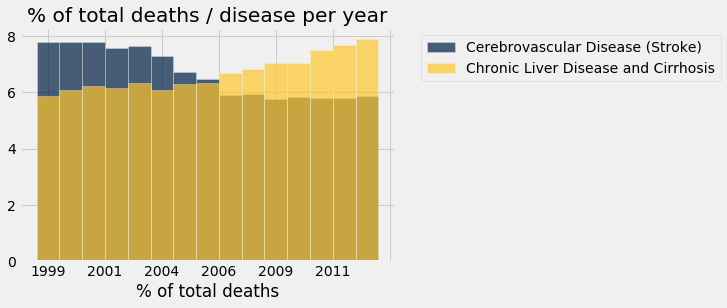

In [46]:
distributions.bar("Year", ["Cerebrovascular Disease (Stroke)","Chronic Liver Disease and Cirrhosis"])

# Don't change the code below this comment.
plt.title("% of total deaths / disease per year")
plt.xlabel("% of total deaths")


## 2. Faculty salaries


In the next cell, we load a dataset created by the [Daily Cal](http://projects.dailycal.org/paychecker/) which contains Berkeley faculty, their departments, their positions, and their gross salaries in 2015.

In [49]:
raw_profs = Table.read_table("faculty.csv").where("year", are.equal_to(2015)).drop("year", "title")
profs = raw_profs.relabel("title_category", "position")
profs

name,department,position,gross_salary
CYNTHIA ABAN,South & Southeast Asian Studies,lecturer,64450
PIETER ABBEEL,Computer Science,associate professor,184998
SALLY ABEL,Law,lecturer,3466
ELIZABETH ABEL,English,professor,138775
DOR ABRAHAMSON,Education,associate professor,100300
KATHRYN ABRAMS,Law,professor,319693
BARBARA ABRAMS,Public Health,professor,191162
SARAH ACCOMAZZO,Social Welfare,lecturer,14779
CHARISMA ACEY,City and Regional Planning,assistant professor,101567
DAVID ACKERLY,Biology,professor,182288


We want to use this table to generate arrays with the names of each professor in each department.

**Question 1.** Set `prof_names` to a table with two columns. The first column should be called `department` and have the name of every department once, and the second column should be called `faculty` and contain an *array* of the names of all faculty members in that department. 

*Hint:* Think about how ```group``` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to ```group```.

In [55]:
# Pick one of the two functions defined below in your call to group.
def identity(array):
    return array 

def first(array):
    return array.item(0)

In [77]:
prof_names_unrelabled=profs.group("department", identity).drop("position identity").drop("gross_salary identity")
prof_names=prof_names_unrelabled.relabel("name identity", "faculty")
prof_names

department,faculty
African American Studies,['AYA DE LEON' 'CHIYUMA ELLIOTT' 'NIKKI JONES' 'DAVID KY ...
Agricultural and Resource Economics and Policy,['MAXIMILIAN AUFFHAMMER' 'CHARLES GIBBONS' 'JEFFREY PERL ...
Anthroplogy,['SABRINA AGARWAL' 'STANLEY BRANDES' 'CHARLES BRIGGS' ' ...
Architecture,['MARK ANDERSON' 'JACOB ATHERTON' 'WILLIAM ATWOOD' 'R.GA ...
Art History,['DILIANA ANGELOVA' 'PATRICIA BERGER' 'JULIA BRYAN-WILSO ...
Art Practice,['ALLAN DESOUZA' 'AIDA GAMEZ' 'RANDY HUSSONG' 'JENNIFER ...
Astronomy,['GIBOR BASRI' 'STEVEN BECKWITH' 'LEO BLITZ' 'EUGENE CHI ...
Bioengineering,['ADAM ARKIN' 'IRINA CONBOY' 'STEVEN CONOLLY' 'JOHN DUEB ...
Biology,['DAVID ACKERLY' 'HILLEL ADESNIK' 'KELLY AGNEW' 'DORIS B ...
Buddhist Studies,['JANN RONIS']


In [78]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** At the moment, the ```name``` column is sorted by last name. Would the arrays you generated in the previous part be the same if we had sorted by first name instead before generating them? Two arrays are the **same** if they contain the same number of elements and the elements located at corresponding indexes in the two arrays are identical. Explain your answer. If you feel you need to make certain assumptions about the data, feel free to state them in your response. 

*The two arrays generated would not be the same. Although the table is grouped by the department, for each row of department, the two arrays generated would contain the same number of elements, but in different order. The elements located at corresponding indexes in the two arrays are not identical, since the first is sorted by last name while the second is sorted by the first name.*

**Question 3.** Set `biggest_range_dept` to the name of the department with the largest salary range, where range is defined as the **difference between the highest salary and the lowest salary in the department**. 

*Hint:* First you'll need to define a new function `salary_range` which takes in an array of salaries and returns the salary range of the corresponding department. Then, set `department_ranges` to a table containing the names and salary ranges of each department. 

In [86]:
# Define salary_range in this cell
def salary_range(array):
    return abs(np.max(array)-np.min(array))

In [126]:
profs_cleaned= profs.group(["department"], identity).drop("name identity").drop("position identity")
salary_range_column=profs_cleaned.apply(salary_range, "gross_salary identity")
department_ranges=profs_cleaned.with_column("salary range by department", salary_range_column).drop("gross_salary identity")
biggest_range_dept=department_ranges.where("salary range by department", np.max(salary_range_column)).column("department").item(0)

In [127]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [130]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw04.ipynb'.
Submit... 100% complete
Submission successful for user: haoyunhong@berkeley.edu
URL: https://okpy.org/cal/data8/sp19/hw04/submissions/5Q9yqx



In [129]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

Finished running all tests.
